# 😶‍🌫️ Utah Air Quality

In [2]:
from datetime import datetime

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from great_tables import GT
from herbie.toolbox import EasyMap
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap, ListedColormap

import synoptic

## Ozone map

Create a custom colormap for ozone

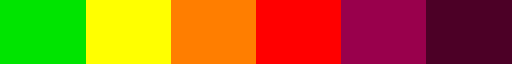

In [3]:
colors = [
    "#00e400",  # Green   - Good
    "#ffff00",  # Yellow  - Moderate
    "#ff7e00",  # Orange  - Sensitive Groups
    "#ff0000",  # Red     - Unhealthy
    "#99004c",  # Purple  - Hazardous
    "#4c0026",  # Maroon  - Very Unhealthy
]
bounds = [0, 55, 71, 86, 106, 201, 300]
ozone_cmap = LinearSegmentedColormap.from_list("ozone", colors, N=len(colors))
norm = BoundaryNorm(bounds, ozone_cmap.N)
ozone_cmap


Get Ozone air quality data at a specific time

In [4]:
df = synoptic.NearestTime(
    attime=datetime(2024, 7, 23, 18),
    within="30m",
    network=9,  # Utah's Division of Air Quality
    vars="ozone_concentration",
).df()
df = df.filter(sensor_index=1).sort("value", descending=True)
df

🚚💨 Speedy delivery from Synoptic's nearesttime service.
📦 Received data from 21 stations.


date_time,variable,sensor_index,is_derived,value,units,id,stid,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,is_restricted,is_active
"datetime[μs, UTC]",str,u32,bool,f64,str,u32,str,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool
2024-07-23 18:00:00 UTC,"""ozone_concentration""",1,false,77.0,"""ppb""",220329,"""QUURB""","""UofU Red Butte""",4996.0,40.76652,-111.82836,9,"""UT""","""America/Denver""",null,2023-09-01 18:00:00 UTC,2024-11-14 03:00:00 UTC,false,true
2024-07-23 18:00:00 UTC,"""ozone_concentration""",1,false,75.0,"""ppb""",31846,"""QRP""","""Rose Park""",4232.0,40.7955,-111.9309,9,"""UT""","""America/Denver""",4225.7,2016-12-07 16:10:00 UTC,2024-11-14 03:00:00 UTC,false,true
2024-07-23 18:00:00 UTC,"""ozone_concentration""",1,false,73.0,"""ppb""",10330,"""QBV""","""Bountiful - Viewmont""",4304.0,40.9029,-111.8844,9,"""UT""","""America/Denver""",4297.9,2004-06-09 00:00:00 UTC,2024-11-14 03:00:00 UTC,false,true
2024-07-23 18:00:00 UTC,"""ozone_concentration""",1,false,73.0,"""ppb""",31843,"""QP2""","""Price""",5682.0,39.5958,-110.77,9,"""UT""","""America/Denver""",5695.5,2011-11-01 00:00:00 UTC,2024-11-14 03:00:00 UTC,false,true
2024-07-23 18:00:00 UTC,"""ozone_concentration""",1,false,70.0,"""ppb""",152942,"""QUTTC""","""Utah Technical Center""",4232.0,40.7771,-111.945,9,"""UT""","""America/Denver""",4232.3,2020-06-29 19:12:00 UTC,2024-11-14 03:00:00 UTC,false,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-07-23 18:00:00 UTC,"""ozone_concentration""",1,false,57.0,"""ppb""",47907,"""QSM""","""Smithfield""",4508.0,41.84278,-111.85194,9,"""UT""","""America/Denver""",4507.9,2015-12-04 19:29:00 UTC,2024-11-14 03:00:00 UTC,false,true
2024-07-23 18:00:00 UTC,"""ozone_concentration""",1,false,57.0,"""ppb""",70743,"""QCV""","""Copperview""",4409.0,40.59806,-111.89417,9,"""UT""","""America/Denver""",4409.4,2018-05-28 02:33:00 UTC,2024-11-14 03:00:00 UTC,false,true
2024-07-23 18:00:00 UTC,"""ozone_concentration""",1,false,54.0,"""ppb""",584,"""QEN""","""Enoch""",5558.0,37.74745,-113.05552,9,"""UT""","""America/Denver""",5551.2,2018-01-24 20:05:00 UTC,2024-11-14 03:00:00 UTC,false,true


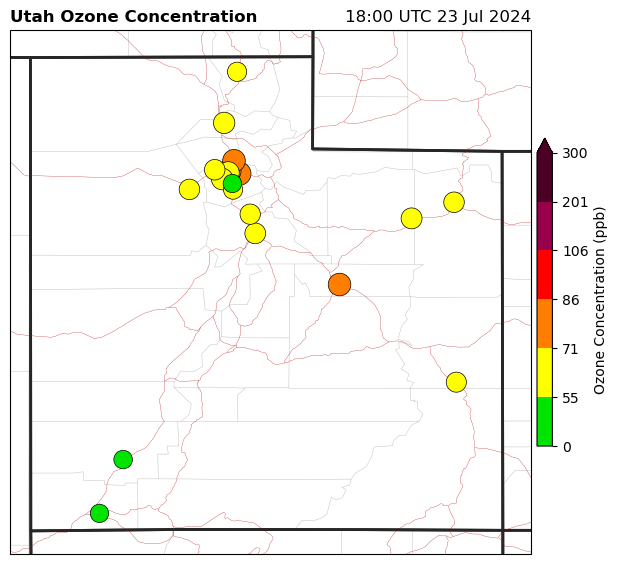

In [5]:
ax = EasyMap(figsize=(8, 8)).COUNTIES().STATES(linewidth=2, alpha=1).ROADS().ax

art = ax.scatter(
    df["longitude"],
    df["latitude"],
    c=df["value"],
    s=df["value"] ** 1.3,  # scale the sizes a little bigger
    cmap=ozone_cmap,
    norm=norm,
    ec="k",
    lw=0.5,
    zorder=10,
)

plt.colorbar(
    art, ax=ax, label="Ozone Concentration (ppb)", extend="max", pad=0.01, shrink=0.5
)

ax.set_title("Utah Ozone Concentration", loc="left", fontweight="bold")
ax.set_title(f'{df['date_time'].max():%H:%M UTC %d %b %Y}', loc="right")

ax.set_extent((-114.25, -108.75, 36.75, 42.25))

## Ozone timeseries

In [6]:
df = synoptic.TimeSeries(
    start=datetime(2024, 7, 23, 21),
    end=datetime(2024, 7, 25, 21),
    network=9,  # Utah's Division of Air Quality
    vars="ozone_concentration",
).df()

# Datetimes as local timezone
df = df.synoptic.with_local_timezone()

# 3h rolling mean
df = df.rolling(
    "date_time", period="3h", group_by=pl.col("stid") + " - " + pl.col("name")
).agg(pl.col("value").mean())

# Plot
df.plot.line(x="date_time", y="value", color="stid").properties(
    title="Utah Air Quality", width=600
)

🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 21 stations.


alt.Chart(...)

## PM 2.5 table

In [32]:
df = synoptic.NearestTime(
    attime=datetime(2023, 12, 19, 21),
    within="30m",
    network=9,  # Utah's Division of Air Quality
    vars="PM_25_concentration",
).df()
df = df.filter(sensor_index=1).sort("value", descending=True)
df.head()

🚚💨 Speedy delivery from Synoptic's nearesttime service.
📦 Received data from 22 stations.


date_time,variable,sensor_index,is_derived,value,units,id,stid,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,is_restricted,is_active
"datetime[μs, UTC]",str,u32,bool,f64,str,u32,str,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool
2023-12-19 21:00:00 UTC,"""PM_25_concentration""",1,false,42.1,"""ug/m3""",87682,"""QNR""","""Near Road""",4282.0,40.66284,-111.9018,9,"""UT""","""America/Denver""",4278.2,2019-01-07 22:17:00 UTC,2024-11-14 03:00:00 UTC,false,true
2023-12-19 21:00:00 UTC,"""PM_25_concentration""",1,false,31.6,"""ug/m3""",589,"""QHW""","""Hawthorne""",4301.0,40.7335,-111.8717,9,"""UT""","""America/Denver""",4294.6,1997-03-28 00:00:00 UTC,2024-11-14 03:00:00 UTC,false,true
2023-12-19 21:00:00 UTC,"""PM_25_concentration""",1,false,29.5,"""ug/m3""",46466,"""QED""","""Erda""",4334.0,40.60056,-112.355,9,"""UT""","""America/Denver""",4327.4,2015-06-24 20:34:00 UTC,2024-11-14 03:00:00 UTC,false,true
2023-12-19 21:00:00 UTC,"""PM_25_concentration""",1,false,29.5,"""ug/m3""",152942,"""QUTTC""","""Utah Technical Center""",4232.0,40.7771,-111.945,9,"""UT""","""America/Denver""",4232.3,2020-06-29 19:12:00 UTC,2024-11-14 03:00:00 UTC,false,true
2023-12-19 21:00:00 UTC,"""PM_25_concentration""",1,false,28.4,"""ug/m3""",164230,"""QLP""","""Lake Park""",4262.0,40.70987,-112.00866,9,"""UT""","""America/Denver""",4252.0,2021-05-07 18:26:00 UTC,2024-11-14 03:00:00 UTC,false,true


In [31]:
(
    GT(
        df.select("value", "stid", "name", "elevation")
        .sort("value", descending=True)
        .head(10)
    )
    .tab_header(
        title="Utah PM 2.5 Concentration (10 Highest)",
        subtitle=f"{df['date_time'].max():%H:%M UTC %d %b %Y}",
    )
    .fmt_number(columns="elevation", compact=True)
    .tab_spanner(label="Location", columns=["stid", "name", "elevation"])
    .cols_label(value="ug/m3", stid="ID", name="Name", elevation="Elevation (ft)")
)


GT(_tbl_data=shape: (10, 4)
┌───────┬───────┬───────────────────────┬───────────┐
│ value ┆ stid  ┆ name                  ┆ elevation │
│ ---   ┆ ---   ┆ ---                   ┆ ---       │
│ f64   ┆ str   ┆ str                   ┆ f64       │
╞═══════╪═══════╪═══════════════════════╪═══════════╡
│ 42.1  ┆ QNR   ┆ Near Road             ┆ 4282.0    │
│ 31.6  ┆ QHW   ┆ Hawthorne             ┆ 4301.0    │
│ 29.5  ┆ QED   ┆ Erda                  ┆ 4334.0    │
│ 29.5  ┆ QUTTC ┆ Utah Technical Center ┆ 4232.0    │
│ 28.4  ┆ QLP   ┆ Lake Park             ┆ 4262.0    │
│ 25.1  ┆ QBV   ┆ Bountiful - Viewmont  ┆ 4304.0    │
│ 24.4  ┆ QIP   ┆ Inland Port           ┆ 4229.0    │
│ 22.2  ┆ QBR   ┆ Brigham City          ┆ 4377.0    │
│ 22.1  ┆ QRP   ┆ Rose Park             ┆ 4232.0    │
│ 21.4  ┆ QSM   ┆ Smithfield            ┆ 4508.0    │
└───────┴───────┴───────────────────────┴───────────┘, _body=<great_tables._gt_data.Body object at 0x7fd9a50d9730>, _boxhead=Boxhead([ColInfo(var='value', type=<ColInfoTypeEnum.default: 1>, column_label='ug/m3', column_align='right', column_width=None), ColInfo(var='stid', type=<ColInfoTypeEnum.default: 1>, column_label='ID', column_align='left', column_width=None), ColInfo(var='name', type=<ColInfoTypeEnum.default: 1>, column_label='Name', column_align='left', column_width=None), ColInfo(var='elevation', type=<ColInfoTypeEnum.default: 1>, column_label='Elevation (ft)', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7fd9a4f67470>, _spanners=Spanners([SpannerInfo(spanner_id='Location', spanner_level=0, spanner_label='Location', spanner_units=None, spanner_pattern=None, vars=['stid', 'name', 'elevation'], built=None)]), _heading=Heading(title='Utah PM 2.5 Concentration (10 Highest)', subtitle='21:00 UTC 19 Dec 2023', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7fd99fe2ecc0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7fd9a4feec30>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table